In [53]:
import numpy as np
from scipy.stats import beta, norm
import matplotlib.pyplot as plt

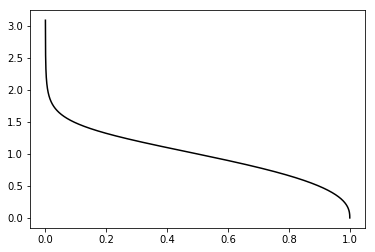

In [46]:
x = np.linspace(0,1, 10000)
a = 0.9
b = 1.4
y = beta.pdf(x, a, b)
plt.plot(x,y, "k-")

In [47]:
from pareto import truncated_pareto
xmin = 1.e3
xmax = 1.e7

k=2

tp = truncated_pareto(k, xmin, xmax)

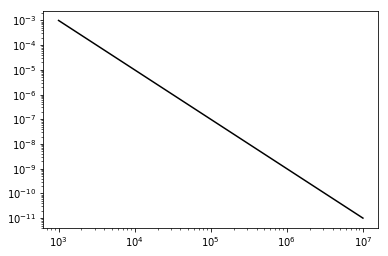

In [48]:
x = np.logspace(np.log10(xmin), np.log10(xmax), 10000)
y = tp.pdf(x)
plt.plot(x,y,"k-")
plt.yscale('log')
plt.xscale('log')

In [51]:
# simulation
energies = tp.samples(int(1.e4))
y = np.random.beta(a, b)

edep = y * energies
reco_energies = np.random.normal(edep, 0.1 * edep)

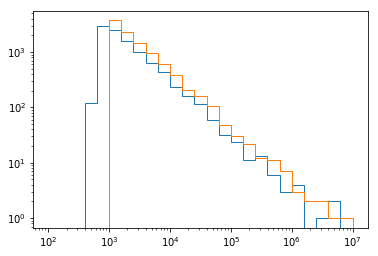

In [52]:
edges = np.linspace(2,7,26)
edges = 10 ** edges
plt.hist(reco_energies, bins=edges, histtype='step')
plt.hist(energies, bins=edges, histtype='step')
plt.xscale('log')
plt.yscale('log')

In [55]:
def joint_pdf(erec, y, enu):
    edep = y * enu
    return norm.pdf(erec, edep, 0.1 * edep) * beta.pdf(y,a,b) * tp.pdf(enu) 



In [ ]:
for erec_pt in np.logspace(3,7,10):
    fint = lambda y, enu: ....